📦 Initial Dataset Shape: (32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


✅ After Cleaning: (32828, 23)


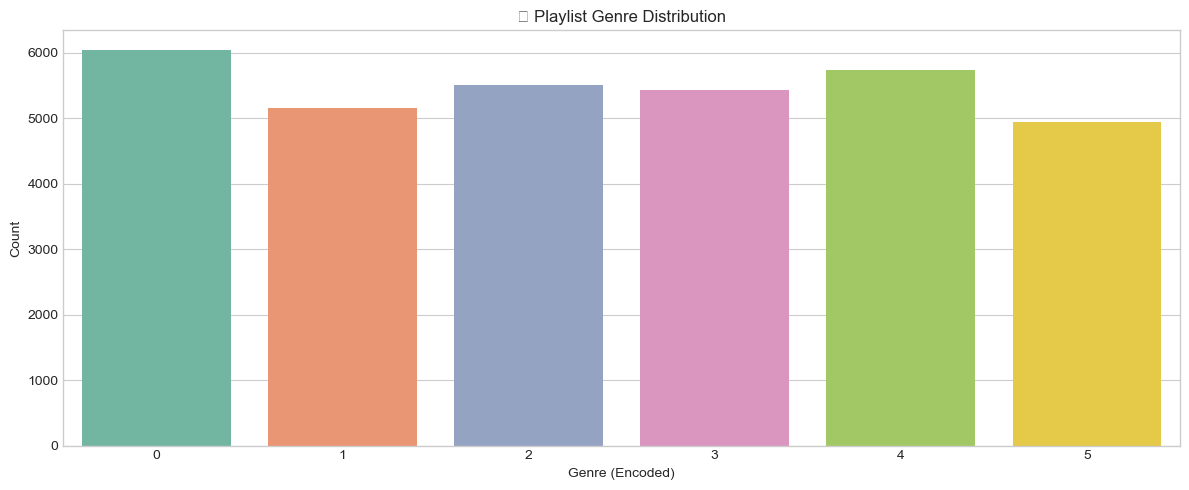

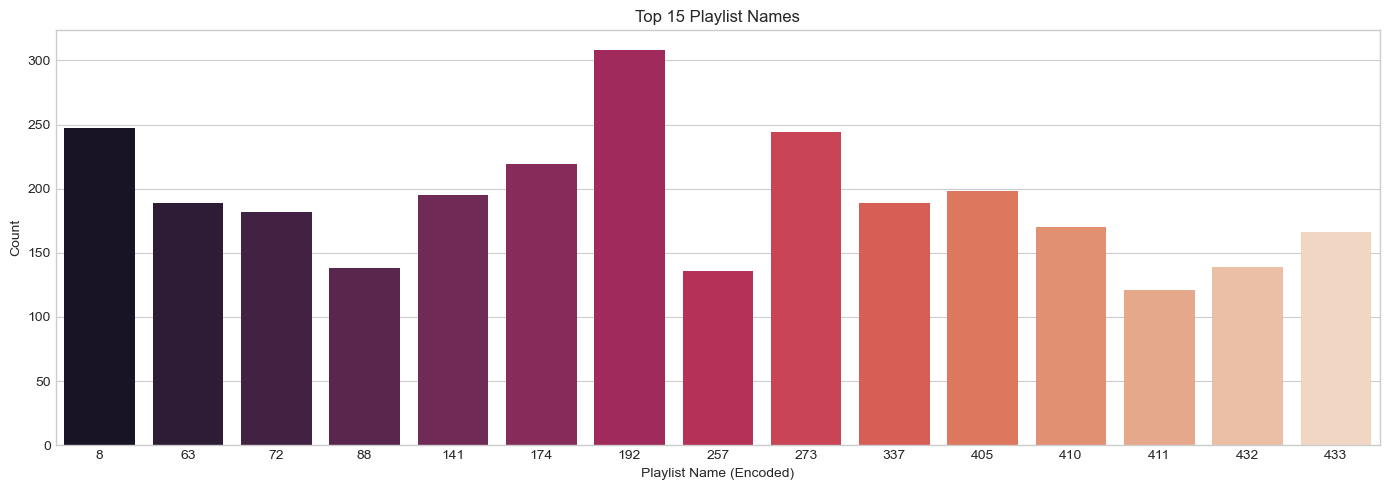

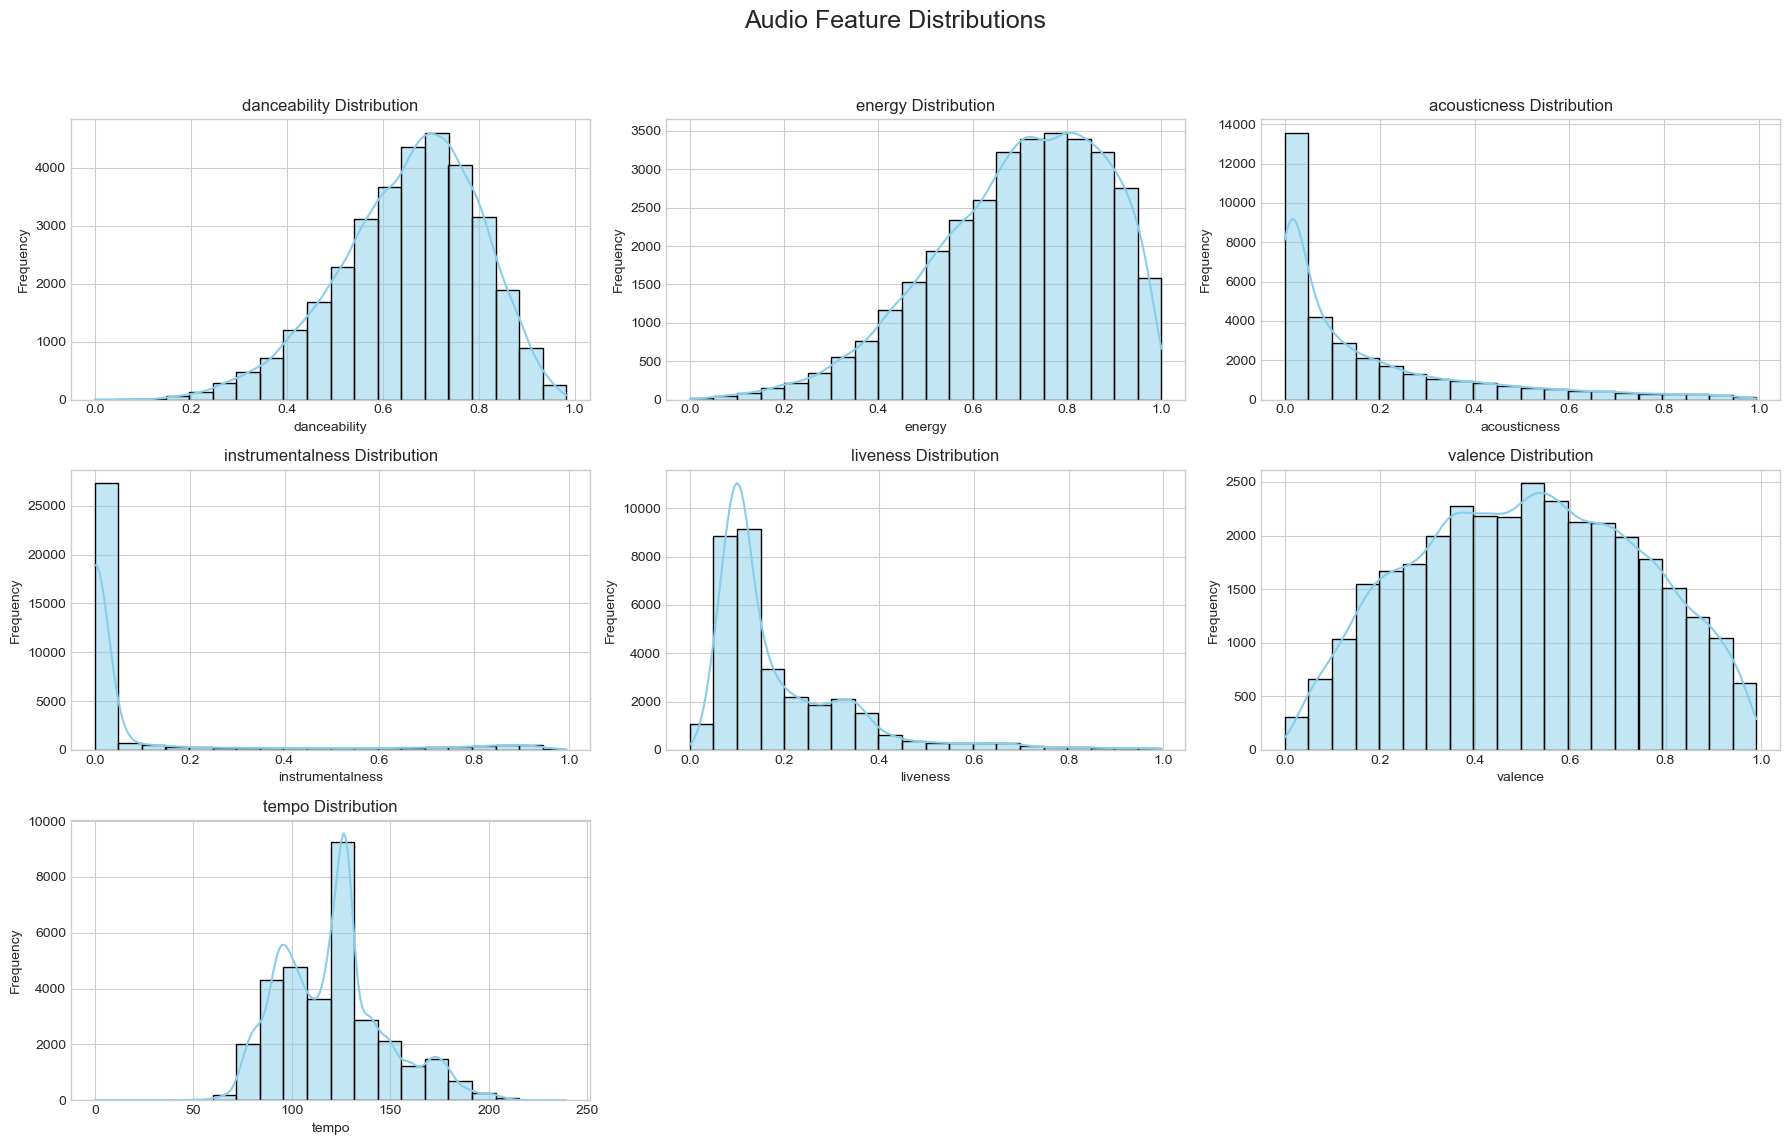

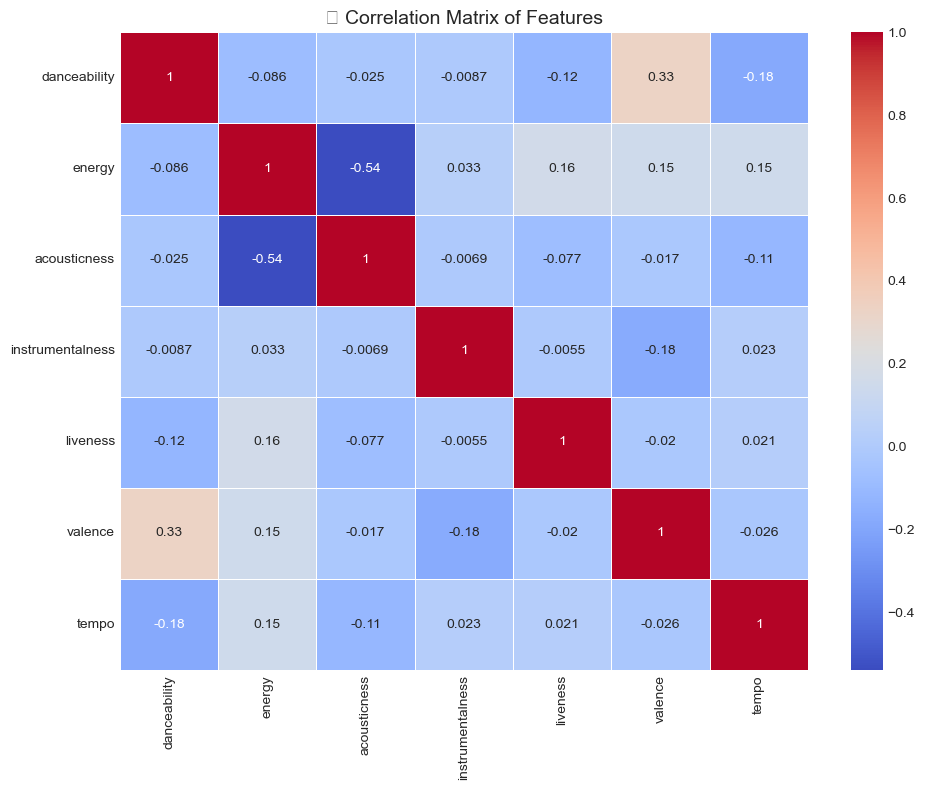

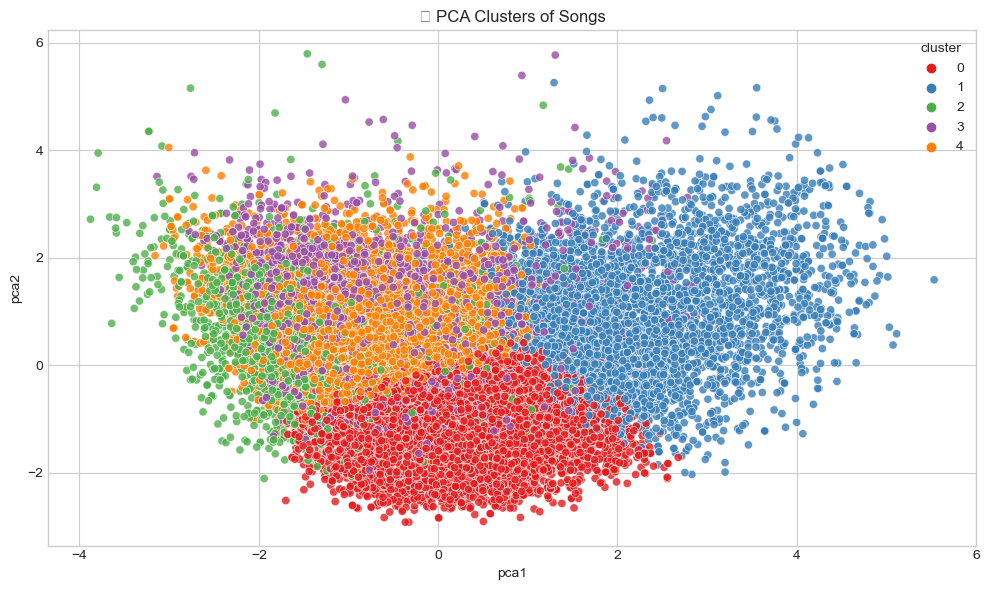

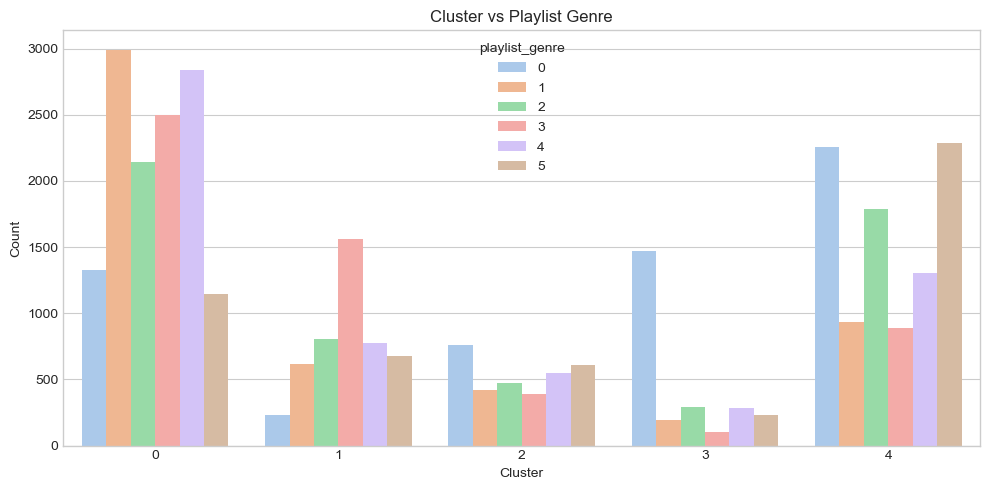

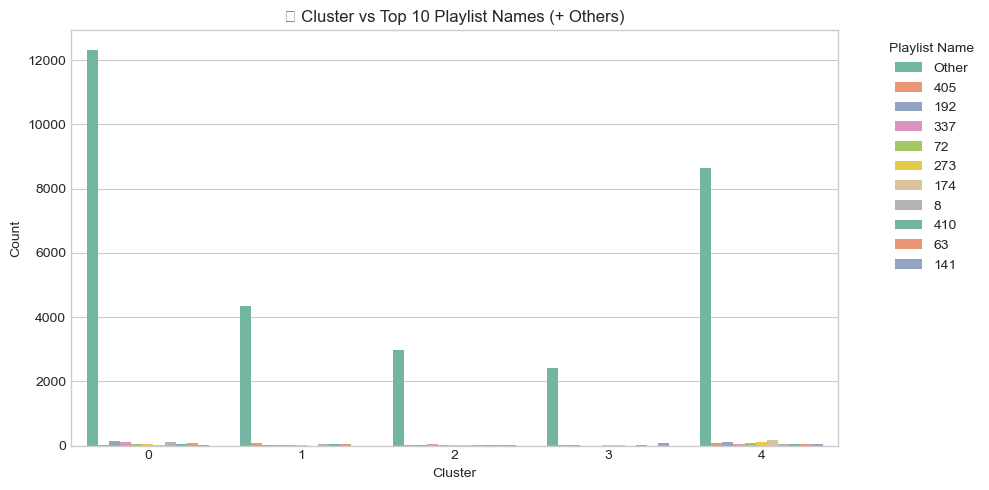

In [4]:
# 🎧 SPOTIFY SONGS' GENRE SEGMENTATION – FINAL PROJECT CODE

# ✅ 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-whitegrid")

# ✅ 2. LOAD THE DATASET
df = pd.read_csv("D:\Renuka\spotify_dataset.csv")
print("📦 Initial Dataset Shape:", df.shape)
display(df.head())

# ✅ 3. DATA PREPROCESSING
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print("✅ After Cleaning:", df.shape)

# Encode categorical features
le_genre = LabelEncoder()
le_name = LabelEncoder()
df['playlist_genre'] = le_genre.fit_transform(df['playlist_genre'])
df['playlist_name'] = le_name.fit_transform(df['playlist_name'])

# ✅ 4. DATA ANALYSIS & VISUALIZATIONS

# 🎵 Genre Distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='playlist_genre', palette='Set2')
plt.title("🎶 Playlist Genre Distribution")
plt.xlabel("Genre (Encoded)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 🎵 Top Playlist Names (Bar Chart)
plt.figure(figsize=(14, 5))
top_playlists = df['playlist_name'].value_counts().head(15)
sns.barplot(x=top_playlists.index, y=top_playlists.values, palette='rocket')
plt.title("Top 15 Playlist Names")
plt.xlabel("Playlist Name (Encoded)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 🎵 Feature Distributions
num_cols = ['danceability', 'energy', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.suptitle("Audio Feature Distributions", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ✅ 5. CORRELATION MATRIX
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Correlation Matrix of Features", fontsize=14)
plt.tight_layout()
plt.show()

# ✅ 6. CLUSTERING SONGS

# Prepare features and scale
X = df[num_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set1', alpha=0.8)
plt.title("🎯 PCA Clusters of Songs")
plt.tight_layout()
plt.show()

# ✅ 7. CLUSTER ANALYSIS

# 🔷 Cluster vs Playlist Genre
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cluster', hue='playlist_genre', palette='pastel')
plt.title("Cluster vs Playlist Genre")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 🔷 Cluster vs Playlist Name (Cleaned Version)

# Step 1: Create cleaned playlist_name with Top 10 + Others
top_names = df['playlist_name'].value_counts().nlargest(10).index
df['playlist_name_clean'] = df['playlist_name'].apply(lambda x: x if x in top_names else 'Other')

# Step 2: Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cluster', hue='playlist_name_clean', palette='Set2')
plt.title("🧼 Cluster vs Top 10 Playlist Names (+ Others)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title='Playlist Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
